In [3]:
import re
from tqdm import tqdm
import json 

def get_kmers(sequences, k):
    kmers = {}
    for sequence in sequences:
        if len(sequence) < k:
            continue
        for i in range (0, len(sequence)-k+1):
            kmer = sequence[i:i+k]
            if kmer in kmers:
                kmers[kmer] += 1
            else:
                kmers[kmer] = 1
    return kmers

def strip_tags(sequence):
    sequence = re.sub("<[^>]+>", "", sequence)
    return sequence.replace(" ", "")

In [34]:
filepath_1 = '../../datasets/doggy_data/test_ft_output_10'

filepath_2 = '../../datasets/doggy_data/test_ft_input_10'

# Trim stuff (dirty)
with open(filepath_1, "r") as handle:
    seqs = []
    handle.readline()
    for seq in handle:
        seqs.append(strip_tags(seq).strip("\r\n"))
    kmers_natural = get_kmers(seqs, 1)

with open(filepath_2, "r") as handle:
    seqs = []
    handle.readline()
    for seq in handle:
        seqs.append(strip_tags(seq).strip("\r\n"))
    kmers_de_novo = get_kmers(seqs, 1)
print(kmers_natural)
print(kmers_de_novo)
shared = kmers_natural.keys() & kmers_de_novo.keys()
print(shared)

print(len(shared)/len(kmers_de_novo.keys()))

IVMTQTPLSLSVSPGETASISCKANLVWYRQKPGQSPQRLINSNRDPGVPDRFSGSGSGTDFTLRISRVEADDAGVYYCFGQGTKLEIK
EGQLAESGGDLVKPAGSLRLSCVASMSWVRQAPEKGLQLVAGYYTDAVKGRFTISRDNAKNTVYLQMNSLRAEDTAMYYCWGQGTLVTVSS
DIVMTQTPLSLSVSPGETASISCKASLSWFRQKPGQSPQGLIYSNRDPGVPDRFSGSGSGTDFTLRINRVEADDAGVYYCFGLGTKLEIK
EVQLVETGGDLVKPGGSLRLSCVASMDWVRQAPGKGLQWLSEYYADAVKGRFTISRDNAKNTLYLQMNSLRAEDTAVYYCWGQGTLVTVSS
EVQLVETGGDLVKPGGTLRLSCVASMSWVRQSPGKGLQWVAVYYADAVKGRFTISRDNAENTLYLQMNNLGAEDTAVYYCWGQGTLVTVSS
EGQLAESGGDLVKPEESLRLSCVVSMRWVRQAPGKGLQWVATDYTDAVKGRFTISRDNAQNTLYLQMNSLRAEDTAVYYCWGQGTLVTVSS
EVQLVESGGDLVKPGGSLRLSCVASMSWVRQAPGKGLQWVGYYYADAVKGRFTISRDNAKNTLYLQMNSLRAEDTAMYYCWGQGTLVTVSS
EVQLVESGGDLVKPGGSLRLSCVASMTWVRQSPGKGLEWVAGYYADSVKGRFTISSDNAKNTFYLQMNSLRVEDTALYYCWGQGTLAPIVK
EGQLAESGPSLVKPSQTLSLTCTISVHWVRQAPGKVSEWLGGYYNPTLKSRLSITRDTSKSQVSLSLSSVTADDTAVYYCWGPGLLVTVSS
SNGNTYLVGQGIQVPVT
GFTFSIYSIDSGGRNTAKDLVATDGGEY
QSLLHTNGNTYRVMQNTQDPFT
GFTFSTYDISSSGSSTARDNWAFDY
GFTFSSYDIWRDGSGTVDPEDLEY
GFTFSNYRISTDGGTTSRNTQLWGDFQY
GFTFSSYYINSGGSSTAGIEGSNWY

Generate natural kmer sets

In [5]:
from tqdm import tqdm
import json 

filepath_1 = '../../datasets/doggy_data/train_pt'
# filepath_2 = '../../datasets/doggy_data/val_pt'
# filepath_3 = '../../datasets/doggy_data/test_pt'

out_path_k = '../../datasets/kmers/kmer_'

raise Exception("Stop here!!! Do not RUN THIS CELL unless you wanna remake the kmers")

for k in range (3, 15):
    with open(filepath_1, "r") as handle:
        seqs = []
        handle.readline()
        for seq in tqdm(handle):
            seqs.append(strip_tags(seq).strip("\r\n"))
        kmers_natural = get_kmers(seqs, k)
    # with open(filepath_2, "r") as handle:
    #     seqs = []
    #     handle.readline()
    #     for seq in tqdm(handle):
    #         seqs.append(strip_tags(seq).strip("\r\n"))
    #     kmers_natural = kmers_natural | get_kmers(seqs, k)
    # with open(filepath_3, "r") as handle:
    #     seqs = []
    #     handle.readline()
    #     for seq in tqdm(handle):
    #         seqs.append(strip_tags(seq).strip("\r\n"))
    #     kmers_natural = kmers_natural | get_kmers(seqs, k)
    out_path = out_path_k + str(k)
    with open(out_path, "w") as handle:
        handle.write(json.dumps(kmers_natural))

340224it [00:00, 752210.57it/s]
340224it [00:00, 1046860.59it/s]
340224it [00:00, 1023332.13it/s]
340224it [00:00, 1037795.37it/s]
340224it [00:00, 1037701.79it/s]
340224it [00:00, 1005746.83it/s]
340224it [00:00, 987917.85it/s] 
340224it [00:00, 947677.85it/s]
340224it [00:00, 951528.73it/s]
340224it [00:00, 1003780.80it/s]
340224it [00:00, 937560.00it/s]
340224it [00:00, 965417.48it/s]


Test validation seqs

In [4]:
natural_kmer_path_template = '../../datasets/kmers/kmer_'

small_ft_full = "../../datasets/outputs/small_ft_full_beam/test/processed"
# Get generated lines
all_generated_small_ft_full = []
with open(small_ft_full, "r") as handle:
        lines = handle.readlines()
        for i in range (0, len(lines), 3):
            generated = lines[i+1].strip()
            all_generated_small_ft_full.append(generated)

small_ft = "../../datasets/outputs/small_ft_beam/test/processed"
# Get generated lines
all_generated_small_ft = []
with open(small_ft, "r") as handle:
        lines = handle.readlines()
        for i in range (0, len(lines), 3):
            generated = lines[i+1].strip()
            if len(generated) > 0:
                all_generated_small_ft.append(generated)

small_ft_only = "../../datasets/outputs/small_ft_only_beam/test/processed"
# Get generated lines
all_generated_small_ft_only = []
with open(small_ft_only, "r") as handle:
        lines = handle.readlines()
        for i in range (0, len(lines), 3):
            generated = lines[i+1].strip()
            if len(generated) > 0:
                all_generated_small_ft_only.append(generated)

all_natural = []
with open(small_ft_only, "r") as handle:
        lines = handle.readlines()
        for i in range (0, len(lines), 3):
            generated = lines[i].strip()
            if len(generated) > 0:
                all_natural.append(generated)
        
overlap_natural = []
overlap_small_ft_full = []
overlap_small_ft = []
overlap_small_ft_only = []
for k in range(3, 15):
    natural_kmer_path = natural_kmer_path_template + str(k)
    with open(natural_kmer_path, "r") as json_file:
        kmers_natural = json.load(json_file)
    overlap_k = []
    for generated in all_generated_small_ft_full:
        kmers_de_novo = get_kmers([generated], k)
        shared = kmers_natural.keys() & kmers_de_novo.keys()
        overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
    overlap_small_ft_full.append(overlap_k)

for k in range(3, 15):
    natural_kmer_path = natural_kmer_path_template + str(k)
    with open(natural_kmer_path, "r") as json_file:
        kmers_natural = json.load(json_file)
    overlap_k = []
    for generated in all_generated_small_ft:
        kmers_de_novo = get_kmers([generated], k)
        if len(kmers_de_novo.keys()) == 0:
            continue
        shared = kmers_natural.keys() & kmers_de_novo.keys()
        overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
    overlap_small_ft.append(overlap_k)

for k in range(3, 15):
    natural_kmer_path = natural_kmer_path_template + str(k)
    with open(natural_kmer_path, "r") as json_file:
        kmers_natural = json.load(json_file)
    overlap_k = []
    for generated in all_generated_small_ft_only:
        kmers_de_novo = get_kmers([generated], k)
        if len(kmers_de_novo.keys()) == 0:
            continue
        shared = kmers_natural.keys() & kmers_de_novo.keys()
        overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
    overlap_small_ft_only.append(overlap_k)

for k in range(3, 15):
    natural_kmer_path = natural_kmer_path_template + str(k)
    with open(natural_kmer_path, "r") as json_file:
        kmers_natural = json.load(json_file)
    overlap_k = []
    for generated in all_natural:
        kmers_de_novo = get_kmers([generated], k)
        if len(kmers_de_novo.keys()) == 0:
            continue
        shared = kmers_natural.keys() & kmers_de_novo.keys()
        overlap_k.append(len(shared)/len(kmers_de_novo.keys()))
    overlap_natural.append(overlap_k)
    

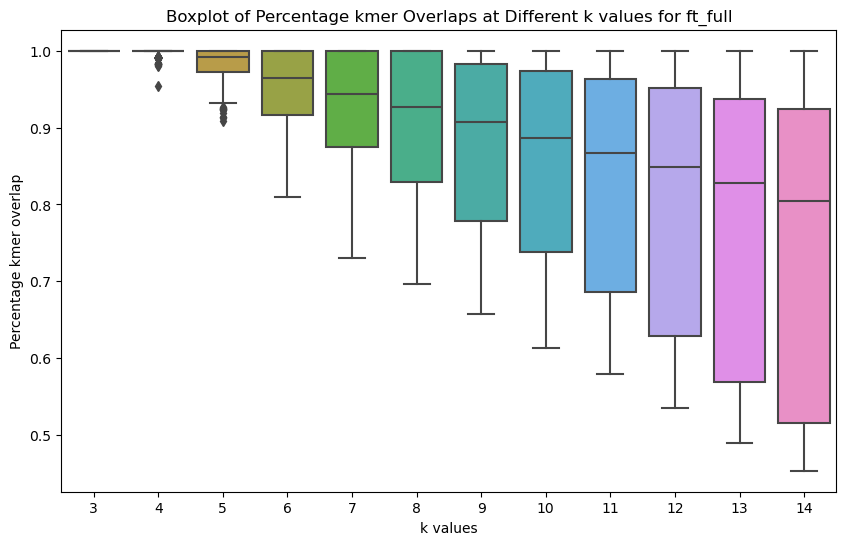

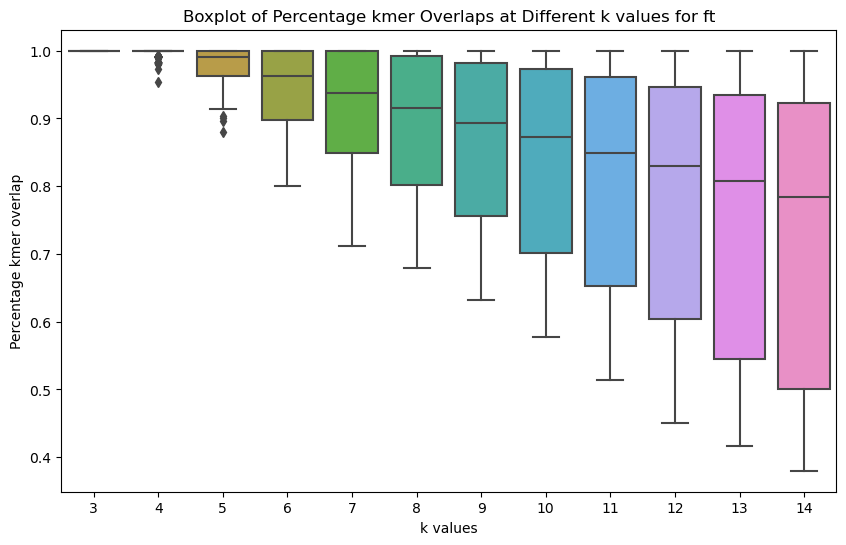

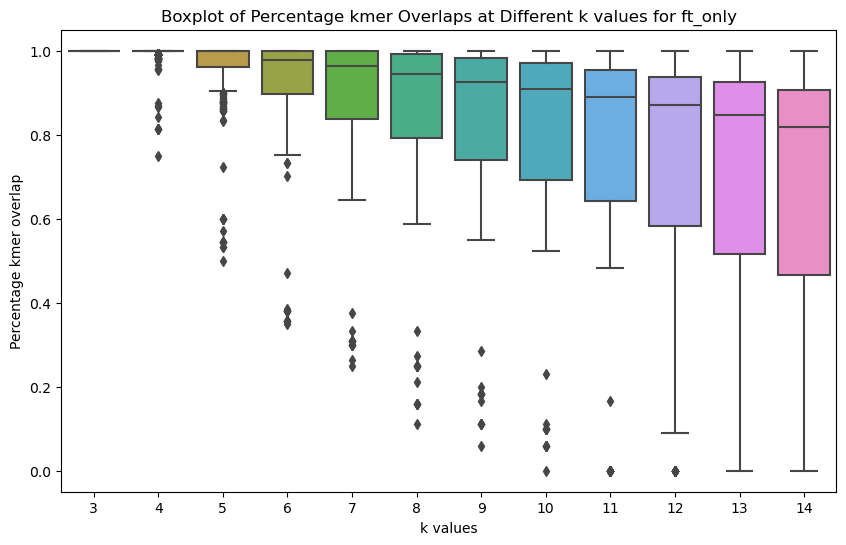

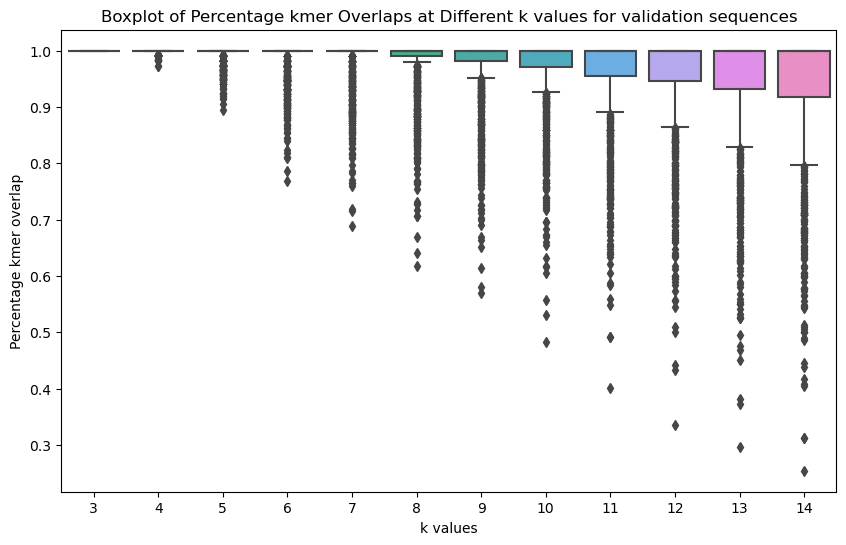

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

boxplot_data = []
k_values = []

for k, overlaps in enumerate(overlap_small_ft_full, start=3):
    boxplot_data.extend(overlaps)
    k_values.extend([k] * len(overlaps))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=boxplot_data)
plt.xlabel('k values')
plt.ylabel('Percentage kmer overlap')
plt.title('Boxplot of Percentage kmer Overlaps at Different k values for ft_full')
plt.show()

boxplot_data = []
k_values = []

for k, overlaps in enumerate(overlap_small_ft, start=3):
    boxplot_data.extend(overlaps)
    k_values.extend([k] * len(overlaps))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=boxplot_data)
plt.xlabel('k values')
plt.ylabel('Percentage kmer overlap')
plt.title('Boxplot of Percentage kmer Overlaps at Different k values for ft')
plt.show()

boxplot_data = []
k_values = []

for k, overlaps in enumerate(overlap_small_ft_only, start=3):
    boxplot_data.extend(overlaps)
    k_values.extend([k] * len(overlaps))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=boxplot_data)
plt.xlabel('k values')
plt.ylabel('Percentage kmer overlap')
plt.title('Boxplot of Percentage kmer Overlaps at Different k values for ft_only')
plt.show()

boxplot_data = []
k_values = []

for k, overlaps in enumerate(overlap_natural, start=3):
    boxplot_data.extend(overlaps)
    k_values.extend([k] * len(overlaps))

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=k_values, y=boxplot_data)
plt.xlabel('k values')
plt.ylabel('Percentage kmer overlap')
plt.title('Boxplot of Percentage kmer Overlaps at Different k values for validation sequences')
plt.show()